## The wonderful 2 dimensional bandstructure function
 **Autors:** *Klára Nováková* and *Andris Potrebko* with a vital teoretical support of *Andreas Wacker*, *Tor Sjöstrand* and *Hofmanns* book *Solid State Physics*     
 **Year:** *2019* 
 
### Some descrption is gonna come here

#### All of the plots at the moment are not pretty and stupid. The Plotting outside the first Brilluin zone is tricky is has to be dealt later

In [1]:
import k3d
plot = k3d.plot()

vertices = [[0, 0, 0], [0, 0, 1], [1, 0, 0]]
indices = [[0, 1, 2]]

mesh = k3d.mesh(vertices, indices)

plot += mesh
# here you would normally create objects to display
# and add them to the plot

plot.display()

Output()

In [2]:
# %matplotlib notebook
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import ipywidgets as widgets
from ipywidgets import interact, interactive
from IPython.display import display
from ipywidgets import HBox, Label
from ipywidgets import FloatSlider

from matplotlib import cm

a=3   #Latice constant in Åmstrongs
sigma=1 #Very arbitrary value
U=15
Len_k=15
A=-U*np.sqrt(2 *np.pi)*sigma/a
NrOfK=5

In [3]:
G=2*np.pi/a
# G_list=np.array([[-G,G],[-G,0.0],[-G,-G],[0.0,G],[0.0,0.0],[0.0,-G],[G,G],[G,0.0],[G,-G]])
# G_list=np.array([[-G,0.0],[0.0,G],[0.0,0.0],[0.0,-G],[G,0.0]])
G_list=np.array([[0.0,0.0],[G,0],[0,G],[G,G]])
NrOfK = len(G_list)

Andreas Wacker wants real numbers (real dimensions), so we define the constant to convert to electronvolts the kinetic energy term (I mean $\frac{\hbar^2 (k+K)^2}{2m}$)

In [4]:
%run BandFunction_2D.ipynb

In [5]:
# EnergiesFull = Energies[:,:,0:5]
# (Energies[:,:,4]-EnergiesFull[:,:,4])/EnergiesFull[:,:,4]

In [6]:
# a=3   #Latice constant in Åmstrongs
# sigma=1 #Very arbitrary value
# U=0/100
# NrOfK=5
# Len_k=5
# A=-U*np.sqrt(2 *np.pi)*sigma/a

# G=2*np.pi/a
# G_list=np.array([[-G,0.0],[G,0.0],[0.0,0.0],[0.0,G],[0.0,-G]])
# kx=0
# ky=4.5

# k_x=np.pi/(a)*kx/Len_k 
# k_y=np.pi/(a)*ky/Len_k
# Eig=np.zeros(shape=(NrOfK, NrOfK))
# for i in range (NrOfK):
#     Eig[i,i] = NormC*((k_x+G_list[i,0])**2+(k_y+G_list[i,1])**2) + A
#     for j in range(i+1,NrOfK):
#         diff_G=(G_list[i,0]-G_list[j,0])**2+(G_list[i,1]-G_list[j,1])**2
#         Eig[i,j]=Eig[j,i]=A*np.exp(-(sigma**2*diff_G)/2) 
# Eig
# E,V=scipy.linalg.eig(Eig)
# # E.sort()
# E

# #find which energy correcponds to the Brilljoun zone to the right
# # if kx>0:
# #     if kx>ky:
# #         E2=0
        

In [7]:
Energies=np.zeros(shape=(Len_k*2+1, Len_k*2+1, NrOfK))
kVect=np.zeros((2,Len_k*2+1,Len_k*2+1))
EnergiesR = Energies[:,:,0].copy()

In [8]:
%%time
Energies=np.zeros(shape=(Len_k*2+1, Len_k*2+1, NrOfK))
kVect=np.zeros((2,Len_k*2+1,Len_k*2+1))

for kx in range(-Len_k,Len_k+1):    
    for ky in range(-Len_k,Len_k+1):
#         %run 2Dbandstructure.ipynb
        k_x=np.pi/(a)*kx/Len_k 
        k_y=np.pi/(a)*ky/Len_k
        E=BandStructF()
        Energies[kx+Len_k,ky+Len_k]=np.real(E)
        
        kVect[0,kx+Len_k,ky+Len_k]=k_x
        kVect[1,kx+Len_k,ky+Len_k]=k_y
        
Energies0 = Energies[:,:,0]
Energies1 = Energies[:,:,1]

Wall time: 892 ms


In [9]:
# Energies[26,26]
len(Energies0)
Energies

31

array([[[-7.12912918, -4.02094917, -4.02094917, -1.53663494],
        [-7.20738946, -4.1215802 , -3.90555011, -1.39886513],
        [-7.41297392, -4.37314101, -3.58854931, -1.03588798],
        ...,
        [-6.69215249, -3.86805885, 24.65887855, 27.42727916],
        [-6.18812838, -3.36498762, 26.27176497, 29.04111845],
        [-5.64714102, -2.8248903 , 27.92196569, 30.69220921]],

       [[-7.20738946, -4.1215802 , -3.90555011, -1.39886513],
        [-7.28624573, -4.02689203, -3.98381039, -1.26215919],
        [-7.49313459, -4.25759544, -3.68431311, -0.90123152],
        ...,
        [-6.77949162, -3.74358291, 24.56956354, 27.55373492],
        [-6.27550135, -3.24047764, 26.1824836 , 29.16754037],
        [-5.7345456 , -2.70034854, 27.83271576, 30.81859953]],

       [[-7.41297392, -4.37314101, -3.58854931, -1.03588798],
        [-7.49313459, -4.25759544, -3.68431311, -0.90123152],
        [-7.70286064, -3.99389257, -3.87239405, -0.54429471],
        ...,
        [-7.00447394, -3.40

#### Some annoying work to find the energies of the second Brilluin zone, i.e the right, left, above, below. The problem is that the energies obtained from the eigenvalue equation are random, so we sorted them. But then from these sorted values we have to sort them again to put in the right coordinate
#### If anybody knows a better solution, I am open for that


For to the right, above and diagonal zone

In [26]:
if NrOfK == 4:
    Energies0[:Len_k, Len_k+1:] = Energies0[Len_k+1:, Len_k+1:][::-1]
#     Energies0[:Len_k, :Len_k] = Energies0[Len_k+1:, Len_k+1:].T
#     Energies0[Len_k+1:, :Len_k] = Energies0[:Len_k, :Len_k][::-1]
    Energies0[Len_k+1:, :Len_k] = Energies0[:Len_k, Len_k+1:].T
    Energies0[:Len_k, :Len_k] = Energies0[Len_k+1:, :Len_k][::-1]

#     Energies1[:Len_k,Len_k+1:] = Energies1[Len_k+1:,Len_k+1:][::-1]
#     Energies1[Len_k+1:,:Len_k] = Energies1[:Len_k,Len_k+1:].T
#     Energies1[:Len_k,:Len_k] = Energies1[Len_k+1:,:Len_k][::-1]


NrOfK

4

In [23]:
np.array([[1,2,3],[4,5,6],[7,8,9]]).T

array([[1, 4, 7],
       [2, 5, 8],
       [3, 6, 9]])

In [11]:
Cond1 = (kVect[0]>=kVect[1])
Cond2 = (kVect[0]<kVect[1])
# Cond3 = (kVect[0]<0) & (-kVect[0]<=abs(kVect[1]))

kVectR = kVect.copy() #To the Right
kVectR[0]=kVectR[0]+G
kVectU = kVect.copy() #To the Up
kVectU[1]=kVectU[1]+G
kVect3 = kVect.copy()
kVect3[0]=kVect3[0]+G  #On the diagonal
kVect3[1]=kVect3[1]+G

def EnergiesOut(*args):
    EnergiesR[Cond1] = Energies[Cond1,2]
    EnergiesR[Cond2] = Energies[Cond2,1]
#     EnergiesR[Cond3] = Energies[Cond3,2]
#     EnergiesR[Cond4] = Energies1[Cond4]

#     EnergiesL = EnergiesR[::-1]
    EnergiesU = EnergiesR.T
#     EnergiesD = EnergiesL.T
    return EnergiesR, EnergiesU

EnergiesR, EnergiesU = EnergiesOut()

For all 9 zones

In [12]:
# Cond1 = (kVect[0]>=0) & (kVect[0]>=abs(kVect[1]))
# Cond2 = (kVect[0]>=0) & (kVect[0]<=abs(kVect[1]))
# Cond3 = (kVect[0]<0) & (-kVect[0]<=abs(kVect[1]))
# Cond4 = (kVect[0]<0) & (-kVect[0]>=abs(kVect[1]))

# kVectR = kVect.copy()
# kVectR[0]=kVectR[0]+G
# kVectU = kVect.copy()
# kVectU[1]=kVectU[1]+G
# kVectL = kVect.copy()
# kVectL[0]=kVectL[0]-G
# kVectD = kVect.copy()
# kVectD[1]=kVectD[1]-G


# def EnergiesOut(*args):
#     EnergiesR[Cond1] = Energies[Cond1,4]
#     EnergiesR[Cond2] = Energies[Cond2,3]
#     EnergiesR[Cond3] = Energies[Cond3,2]
#     EnergiesR[Cond4] = Energies1[Cond4]

#     EnergiesL = EnergiesR[::-1]
#     EnergiesU = EnergiesR.T
#     EnergiesD = EnergiesL.T
#     return EnergiesR, EnergiesL,  EnergiesU, EnergiesD

# EnergiesR, EnergiesL, EnergiesU, EnergiesD = EnergiesOut()

In [13]:
# EnergiesR = Energies[:,:,0].copy()
# Energies11 = Energies[:,:,0].copy()
# Cond3 = (kVect[0]<0) & (-kVect[0]<=abs(kVect[1]))
# Cond4 = (kVect[0]<0) & (-kVect[0]>=abs(kVect[1]))

# Cond5 = (kVect[0]<=0) & (kVect[1]<=0)

# kVect1 = kVect.copy()
# kVect1=kVect1+G
# kVect4 = -kVect1
# kVect2 = kVect.copy()
# kVect2[0]=kVect2[0]+G
# kVect2[1]=kVect2[1]-G
# kVect3 = - kVect2


# def EnergiesOut(*args):
#     EnergiesR[Cond3] = Energies[Cond3,2]
#     EnergiesR[Cond4] = Energies1[Cond4]
#     Energies11[Cond5] = Energies[Cond5,3]

#     EnergiesL = EnergiesR[::-1]
#     EnergiesU = EnergiesR.T
#     EnergiesD = EnergiesL.T
#     return EnergiesR, EnergiesL,  EnergiesU, EnergiesD, Energies11

# EnergiesR, EnergiesL, EnergiesU, EnergiesD, Energies1 = EnergiesOut()

### Fermi energi

In [14]:
EF = np.sort(np.append(Energies0,Energies1))[(Len_k*2+1)**2]
# EFermi = np.full((10, 10), EF)
EFermi = np.full((10,10), EF)
kxFermi, kyFermi = np.meshgrid(np.linspace(kVect[0,0,0]*0.8,kVect[0,-1,-1]*1.01,10),
                               np.linspace(kVect[0,0,0]*0.8,kVect[0,-1,-1]*1.01,10))


### Draw also the not calclated regions using the polar coordinates

In [15]:
#### The neigbouring Brilluin zones in polar coordinates
EndK = int(Len_k*np.sqrt(2)) + 1 
r = kVect[0][:(EndK),1]+G
p = np.linspace(0, 2*np.pi, 50)
EnergyPolar = EnergiesR[:(EndK),(Len_k+1)]
EnPolar = np.meshgrid(EnergyPolar,p)[0]
R, P = np.meshgrid(r, p)
# Express the mesh in the cartesian system.
X, Y = R*np.cos(P), R*np.sin(P)
maxLim = np.max(EnPolar)

In [16]:
InRadius = (np.abs(X)<np.max(kVect[0]) ) & ( np.abs(Y)<np.max(kVect[0])) 
EnPolar[InRadius] = (np.min(Energies)-5000)*2

OutRadius = (np.abs(X)>(np.max(kVect[0])*2) ) | ( np.abs(Y)> (np.max(kVect[0])*2) ) 
EnPolar[OutRadius] = (np.max(Energies)+1000)*2

np.max(kVect[0])


1.0471975511965976

In [17]:
# fig1 = plt.figure()
# ax1 = plt.axes(projection="3d")
# mycmap = plt.cm.viridis
# mycmap.set_bad('k', alpha=0)
# mycmap.set_under('k', alpha=0)
# mycmap.set_over('k', alpha=0)

# C1 = ax1.plot_surface(X, Y, EnPolar, cmap=mycmap,vmin=np.min(Energies),vmax=maxLim,linewidth=0, rstride=1, cstride=1)
# C2 = ax1.plot_surface(kVect[0],kVect[1], Energies[:,:,0],vmin=np.min(Energies),vmax=maxLim, rstride=1, cstride=1,
#                 cmap=mycmap, edgecolor='none')#Energies[:,:,2]
# C2 = ax1.plot_surface(kxFermi,kyFermi, EFermi,vmin=np.min(Energies),vmax=maxLim, rstride=1, cstride=1,
#                 cmap=mycmap, edgecolor='none')#Energies[:,:,2]
# ax1.set_zlim3d(np.min(Energies),maxLim)
# cnar = fig1.colorbar(C2)

In [18]:
# # ?k3d.surface
# ?plot.camera
# ?k3d.plot

### Plot bandstructure surfaces with the second band inclined inside

In [27]:
plot = k3d.plot(height=320) #,camera_auto_fit=False, grid_auto_fit=False,grid=(-1, -1, -100, 1, 1, 1)
# Energies+
# Energies0
plot += k3d.surface(Energies0.astype(np.float32), xmin=-1, xmax=1, ymin=-1, ymax=1,zmin=0,zmax=0.2)
# plot += k3d.surface(Energies1.astype(np.float32), xmin=-1, xmax=1, ymin=-1, ymax=1,zmin=0,zmax=0.2)

# plot.camera = [1.039, -0.196, -0.069,  0.25 ,  0.   ,  0.25 ,  0.426, -0.006, 0.905]
plot.display()

Output()

In [20]:
%matplotlib
# %%capture
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.plot_surface(kVect[0],kVect[1], Energies0,vmin=np.min(Energies),vmax=np.max(Energies), rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')#Energies[:,:,2]
# ax.plot_surface(kVectR[0,0:Len_k],kVectR[1,0:Len_k], EnergiesR[0:Len_k],vmin=np.min(Energies),vmax=np.max(Energies),cmap='viridis')
# ax.plot_surface(kVect1[0,0:Len_k,0:Len_k],kVect1[1,0:Len_k,0:Len_k], Energies11[0:Len_k,0:Len_k],vmin=np.min(Energies),vmax=np.max(Energies),cmap='viridis')
# ax.plot_surface(kVect3[0],kVect3[1], Energies[:,:,3],vmin=np.min(Energies),vmax=np.max(Energies),cmap='viridis')
# ax.plot_surface(kVectL[0],kVectL[1], EnergiesL,vmin=np.min(Energies),vmax=np.max(Energies),cmap='viridis')
# ax.plot_surface(kVectU[0],kVectU[1], EnergiesU,vmin=np.min(Energies),vmax=np.max(Energies),cmap='viridis')
# ax.plot_surface(kVectD[0],kVectD[1], EnergiesD,vmin=np.min(Energies),vmax=np.max(Energies),cmap='viridis')
# ax.plot_surface(X, Y, EnPolar, cmap='viridis',vmin=np.min(Energies),vmax=np.max(Energies))

ax.set_xlabel('$k_x$')
ax.set_ylabel('$k_y$')
ax.set_zlabel('Energy')
# plt.colorbar(m)



Using matplotlib backend: Qt5Agg


Text(0.5, 0, '$k_x$')

Text(0.5, 0, '$k_y$')

Text(0.5, 0, 'Energy')

In [21]:
# ColAbove[Len_k:-1,Len_k:-1]

### Plot bandstructure surfaces with the second band inclined inside

In [22]:
# x=np.linspace(-5,5,50)
# y = np.linspace(-5, 5, 50)
# X, Y = np.meshgrid(x, y)
# fig = plt.figure()
# Z = (X+Y)**2 + 4* (X-Y)**2
# ax = plt.axes(projection="3d")
# ax.plot_surface(X,Y,Z,cmap='viridis')

# ax.plot([-1.8],[-3],[(-1.8-3)**2 + 4* (-1.8+3)**2],'ro',markersize=10)
# ColAbove[Len_k:-1,Len_k:-1]

In [23]:
kVectIn = kVect[:,Len_k:-1,Len_k:-1]
Energies0In = Energies0[Len_k:-1,Len_k:-1]
Energies1In = Energies1[Len_k:-1,Len_k:-1]
kxFermiIn,kyFermiIn, EFermiIn = kxFermi[4:-1,4:-1],kyFermi[4:-1,4:-1], EFermi[4:-1,4:-1] 
# EFermiIn = EFermi[Len_k:-1,Len_k:-1]

In [24]:
# %%capture

#####Make different colors above/below the Fermi level
ColLow, ColAbove = Energies0.copy(),Energies1.copy()

def PlotIn(EF, Energies0, Energies1, EFermi, *args):
#### Make the colors continuous so that below EF it would be in interval (0;0.4) and above (0.6;1)
#### First find the slope
    slopeColorL = 0.4/(EF - np.min(Energies0In))
    slopeColorH = 0.4/(np.max(Energies1In) - EF)

    ColLow[Energies0<EF] = 0#slopeColorL * (Energies[Energies0<EF,0]-np.min(Energies0) )
    ColLow[Energies0>EF] = 1#0.6 + slopeColorH * (Energies[Energies0>EF,0] - EF)
    ColAbove[Energies1<EF] = 0#slopeColorL * (Energies[Energies1<EF,0] - np.min(Energies0))
    ColAbove[Energies1>EF] =1#0.6 + slopeColorH * (Energies[Energies1>EF,0] - EF)

    #####Make the plot
#     ax1.plot_trisurf(kVectIn[0].flatten(),kVectIn[1].flatten(), EFermiIn.flatten(),alpha=0.3)#Energies[:,:,2] #kVectIn[0],kVectIn[1],
    ax1.plot_surface(kVectIn[0],kVectIn[1], Energies1In,facecolors=cm.plasma(ColAbove[Len_k:-1,Len_k:-1]),
                    edgecolor='none',alpha=0.99,antialiased=False,zorder=2, shade=True)#Energies[:,:,2]
    ax1.plot_surface(kVectIn[0],kVectIn[1], Energies0In,vmin=np.min(Energies),vmax=np.max(Energies1In), rstride=1, cstride=1,
                    facecolors=cm.plasma(ColLow[Len_k:-1,Len_k:-1]), edgecolor='none',antialiased=False,zorder=3)#Energies[:,:,2]
    ax1.plot_surface(kxFermiIn,kyFermiIn, EFermiIn, rstride=1, cstride=1,color='r',
                    edgecolor='none',antialiased=False,zorder=1,alpha=0.3)#Energies[:,:,2]

    ax1.set_xlabel('$k_x$ $(1/ \AA)$')
    ax1.set_ylabel('$k_y$ $(1/ \AA)$')
    ax1.set_zlabel('Energy (eV)')
    ax1.set_zlim3d(np.min(Energies),np.max(Energies1In))
# cnar = fig.colorbar(C2)

fig = plt.figure(figsize=plt.figaspect(0.5))
ax2 = fig.add_subplot(1, 2, 2)
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
PlotIn(EF, Energies0, Energies1, EFermi)

To plot the whole Brilluin zone in

In [25]:
# # %%capture

# #####Make different colors above/below the Fermi level
# ColLow, ColAbove = Energies0.copy(),Energies1.copy()

# def PlotIn(EF, Energies0, Energies1, EFermi, *args):
# #### Make the colors continuous so that below EF it would be in interval (0;0.4) and above (0.6;1)
# #### First find the slope
#     slopeColorL = 0.4/(EF - np.min(Energies0))
#     slopeColorH = 0.4/(np.max(Energies1) - EF)

#     ColLow[Energies0<EF] = slopeColorL * (Energies[Energies0<EF,0]-np.min(Energies0) )
#     ColLow[Energies0>EF] = 0.6 + slopeColorH * (Energies[Energies0>EF,0] - EF)
#     ColAbove[Energies1<EF] = slopeColorL * (Energies[Energies1<EF,0] - np.min(Energies0))
#     ColAbove[Energies1>EF] =0.6 + slopeColorH * (Energies[Energies1>EF,0] - EF)

#     #####Make the plot
#     ax1.plot_surface(kxFermi,kyFermi, EFermi, rstride=1, cstride=1,color='r',
#                     edgecolor='none',alpha=0.3,antialiased=False)#Energies[:,:,2]
#     ax1.plot_surface(kVect[0],kVect[1], Energies1,
#                     facecolors=cm.plasma(ColAbove),rstride=1, cstride=1,
#                     edgecolor='none',antialiased=False)#Energies[:,:,2]
#     ax1.plot_surface(kVect[0],kVect[1], Energies0,vmin=np.min(Energies),vmax=np.max(Energies1), rstride=1, cstride=1,
#                     facecolors=cm.plasma(ColLow), edgecolor='none',antialiased=False)#Energies[:,:,2]

#     ax1.set_xlabel('$k_x$ $(1/ \AA)$')
#     ax1.set_ylabel('$k_y$ $(1/ \AA)$')
#     ax1.set_zlabel('Energy (eV)')
#     ax1.set_zlim3d(np.min(Energies),np.max(Energies1-100))
# # cnar = fig.colorbar(C2)

# fig = plt.figure(figsize=plt.figaspect(0.5))
# ax2 = fig.add_subplot(1, 2, 2)
# ax1 = fig.add_subplot(1, 2, 1, projection='3d')
# PlotIn(EF, Energies0, Energies1, EFermi)

### The energy band sheme or how it is called
I wanted to put on the x axis the distance from the origin to the point, this is why all of the $\sqrt{k_x^2 + k_y^2}$ appear but it did not look pretty, so I multiply by 2

In [26]:
# fig2, ax2 = plt.subplots(1,1)

def BandStructure(*args):
    EnergyDiag = np.diag(Energies0[::-1,:])[:Len_k+1]
    kDiag = kVect[1][0,Len_k:]*np.sqrt(2)

    ax2.plot(kVect[0][Len_k:,1],Energies0[Len_k:,Len_k])
    ax2.plot(np.sqrt(kVect[0][-1,1]**2+(kVect[1][-1,Len_k:])**2*3),Energies0[-1,Len_k:])
    ax2.plot(kVect[0][-1,1]*(2+kDiag),EnergyDiag)
    # ax2.plot(kVect[1][1,(Len_k+1):(2*Len_k+1)],Energies[(2*Len_k+1),(Len_k+1):(2*Len_k+1),1])

    ax2.set_xticks([0,kVect[0][-1,1],kVect[0][-1,1]*2,kVect[0][-1,1]*2+kDiag[-1]])
    ax2.set_xticklabels(('X', '$\Gamma$', 'Y', 'X'))
    ax2.tick_params(axis='x', colors='r', grid_color='r', labelsize=16)
    # ax2.set_xlabel('$k$') #$(1/ \AA)$
    ax2.set_ylabel('Energy (eV)')

BandStructure()

### Begin interaction
#### Note that we do not calculate the lattice anymore (kVect, ...), because the lattice does not change

In [27]:
def f(Pot=U,InOut=1,*args):
    global A, kx, ky
    U=Pot*20
    
    A=-U*np.sqrt(2 *np.pi)*sigma/a
    for kx in range(-Len_k,Len_k+1):    
        for ky in range(-Len_k,Len_k+1):
            E=BandStructF()
#             %run 2Dbandstructure.ipynb
            Energies[kx+Len_k,ky+Len_k]=np.real(E)
#             kVect[0,kx+Len_k,ky+Len_k]=kx
#             kVect[1,kx+Len_k,ky+Len_k]=ky
    ax1.cla()
    ax2.cla()
    Energies0 = Energies[:,:,0]
    Energies1 = Energies[:,:,1]
    EF = np.sort(np.append(Energies0,Energies1))[(Len_k*2+1)**2]
    EFermi[:,:] = EF
    if InOut:
        PlotIn(EF, Energies0, Energies1, EFermi)
    else:
        ax1.plot_surface(kVect[0],kVect[1], Energies0, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')
        ax1.set_xlabel('$k_x (1/ \AA)$')
        ax1.set_ylabel('$k_y (1/ \AA)$')
        ax1.set_zlabel('Energy (eV)')
    BandStructure()
    
    
The_Interaction=interactive(f,Pot=widgets.FloatSlider(min=0,max=100,step=1, continuous_update = False),
                            InOut=[('Out', 0), ('In', 1)]) 

In [28]:
for widg in The_Interaction.children[:-1]:
    widg.description = ""
#     widg.continuous_update = False
    

pot, InOut = [
    The_Interaction.children[i] for i in range(2)]

FirstBox = widgets.HBox([Label(r'Potential'), pot, Label(r'Plot Inside/Outside'), InOut])


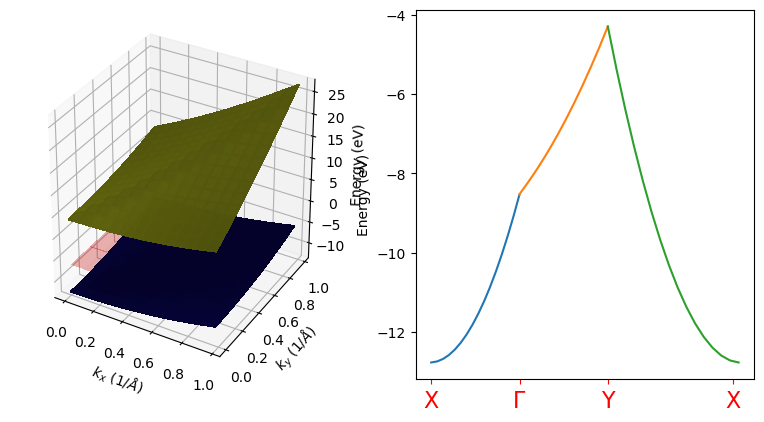

In [29]:
display(FirstBox)
fig